<p align="center">
  <img src="https://www.edvancer.in/wp-content/uploads/2016/01/ML-vs.-stats1.png" 
</p>

## <div align="center">Machine Learning and Statistics: Tasks</div>
### <div align="center">Author: Sean Elliott</div>

----

In [1]:
# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

#for shuffling the data.
import random

#numerical arrays.
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris


## <p align="center">Task 1</p> 
Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as 'math'. In this task,1 you should write a function 'sqrt(x)' to approximate the square root of a floating point number 'x' without using the power operator or a package.
Rather, you should use 'Newton’s method'. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say 0.01.

$$z_{i+1} = z_i - \frac{z_i * z_i - x}{2z_i} $$

'*' denotes multiplication


Newtons Method

Newtons Method (also known as Newton Raphson Method) is an iterative process that can approximate the solutions to an equation with good accuracy. Its main uses is as a method to approximate numerical solutions to equations that are too difficult to solve by hand.



In [2]:
# First attempt at writing code for square root 
def sqrt(x):
  # First guess for square root.
  z = x / 4.0
  # create a loop that will run for a designated set number of times.
  for i in range (1000):
    z = z - (((z * z) - x) / (2 * z))
# return z which should be a good approximation fo the square root.
  return z

In [3]:
# test function created above.
sqrt(15)

3.8729833462074166

In [4]:
# test built in python function.
15**0.5

3.872983346207417

-----

## References: 

https://medium.com/@shouke.wei/how-to-embed-an-image-size-and-align-it-in-the-jupyter-notebook-542a2e4e2c98 Date Accessed: 26/09/2023 19:42

https://saturncloud.io/blog/how-to-position-embedded-images-in-jupyter-notebooks-using-markdown/ Date Accessed: 26/09/2023 19:47

https://calcworkshop.com/derivatives/newtons-method/#:~:text=Newton's%20Method%2C%20also%20known%20as,us%20to%20solve%20by%20hand. Date Accessed: 29/10/2023 12:47

https://en.wikipedia.org/wiki/Newton%27s_method Date Accessed: 29/10/2023 11:30



***

<p align="center"><img src="https://www.veganfoodandliving.com/wp-content/uploads/2022/02/Best-vegan-biscuits-uk.jpg"</p>

## <p align="center"> Task 2</p> 

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. 
Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


We will start this project by first defining what the Chi-Squared Test is; and what it's correct uses are.
The LaTeX notation for the Chi-Squared Test is as follows:


$$\chi^2 = \sum \frac {(O - E)^2}{E}$$

----

<p><div align="center">The break down of the above values:</div></p>


$$\chi^2$$ 
<div align="center">the chi-square test statistic</div>


$$\sum $$  
<div align="center">is the summation operator (meaning find the sum of)</div>


$$ O $$
<div align="center">is the observed frequency value</div>


$$ E $$ 
<div align="center">is the expected frequency value</div>

----

The idea behind the Chi-squared test is a simple one: the test is used to compare 'actual' data values with what would be 'expected' if the null hypothesis is true. The test involves finding the squared difference between the actual results and the expected results and then dividing that difference by the expected data results.
The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables being analysed.

The Chi Squared Test was first developed by Karl Pearson in 1990. He created the Chi Squared Test (amonungst other tests) in order to debunk a common misconception in the biological data anaysis field of the time. A common assumption amoungst researchers was that biological data tended towards a Normal Distirbution. Pearson disputed this, noting a significant skewness to certain datasets - which drove him to develop a set of statistical analysis tests which would more accurately find out how well a model fit into an observation - this time taking their skewness into consideration in the final result.

In [5]:
# Create the data represented in the tabnle so that it can be fed into the program.

coffee_choc = [['Coffee','Chocolate']] * 43
coffee_plain = [['Coffee','Plain']] * 57
tea_choc = [['Tea','Chocolate']] * 56
tea_plain = [['Tea','Plain']] * 45

#store the 4 value sets above in 1 variable 'data'.
data = coffee_choc + coffee_plain + tea_choc + tea_plain

In [6]:
# shuffle the way the data appears in the dataset, but doesnt alter the results - ensures that the data doesnt look contrived.
random.shuffle(data)

In [7]:
# zip the data
drink, biscuit = list(zip(*data))

In [8]:
# create dataframe 
df = pd.DataFrame({'drink': drink, 'biscuit': biscuit})

#print out datafarme to ensure running as expected.
df.head(5)


,drink,biscuit
0,Coffee,Plain
1,Coffee,Plain
2,Coffee,Plain
3,Coffee,Chocolate
4,Coffee,Plain


In [9]:
# create a contingency table of 'drinks' against 'biscuits' using data from the dataframe
cross = ss.contingency.crosstab(df['drink'], df['biscuit'])

# Show.
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [10]:
# organise data within dataset for easy manipulation.
first, second = cross.elements

# Show arrays 
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

In [11]:
# count the values of the table - as shown in the randomly generated dataframe above.
cross.count 

array([[43, 57],
       [56, 45]])

In [12]:
# perform the chi squared test of independence on the table and store the finds in the variable 'result'.
result = ss.chi2_contingency(cross.count, correction=False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [13]:
# The expected fequencies from the reults variable.
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

In [14]:
# display the difference between the observed frequencies and the expected frequencies.
cross.count - result.expected_freq

array([[-6.25373134,  6.25373134],
       [ 6.25373134, -6.25373134]])

In [15]:
#square the differences between the observed and the expected frequencies.
(cross.count - result.expected_freq)**2

array([[39.10915571, 39.10915571],
       [39.10915571, 39.10915571]])

In [16]:
# divide the squared values into the result of the expected frquencies. This 'normalises' the values.
(cross.count - result.expected_freq)**2 / result.expected_freq

array([[0.79403437, 0.77068042],
       [0.78617265, 0.76304992]])

In [17]:
# print the sum of all the normalised squared differences which represents the toal chi-squared statistics. This single number represents the discrepancy between the observed and expercted counts.
((cross.count - result.expected_freq)**2 / result.expected_freq).sum()

3.113937364324669

So, what do we do with all of this information you ask? And how is it relevant?
Basically we are now taking the numbers our program has provided us with, and using them to either prove or disprove the null hypothesis. We start by adding all of our values.

<div align="center">0.79403437 + 0.77068042 + 0.78617265 + 0.76304992 = 3.113937364324669</div>

Now we take into consideration our degree of freedom (being 1). 
The formula for counting this is below: 

<div align="center">Degrees of Freedom = (number of rows − 1) × ( number of columns − 1)</div>

<p><div align="center">DF = (2-1) X (2-1) = 1</div></p>

We now use a Chi Squared Distribution table to find out the critical value of Chi Squared, which is 3.841. With 0.05 as our alpha value (standardised value) and 1 being our degrees of Freedom value - as our calculation of 3.114 is lower than 3.841; we can thus assume that the the observed frequencies are not different from the expected frequencies; thus confirming the null hypothesis meaning that the results are not significant and that there is no link between hot beverage choice and biscuit choice.

<p align="center"><img src="https://www.scribbr.com/wp-content/uploads/2022/05/chi-square-distribution-table-critical-value.png"</p>

-----

## References: 

https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf - Date Accessed 28/10/23

*** 

<p align="center"><img src="https://www.gabemednick.com/post/penguin/featured.png"</p>

## <div align="center"> Task 3 </div>

Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.


In [18]:
#Load penguins csv file.
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
df = pd.read_csv(url)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [19]:
# Gentoo Male Samples   
male = df[(df['species'] == 'Gentoo') & (df['sex'] == 'MALE')][['body_mass_g']].to_numpy()

In [20]:
# Gentoo Female Samples
female = df[(df['species'] == 'Gentoo') & (df['sex'] == 'FEMALE')][['body_mass_g']].to_numpy()

In [21]:
# Perform t-test using built-in function.
ss.ttest_ind(male, female)

Ttest_indResult(statistic=array([14.72167648]), pvalue=array([2.1336876e-28]))

## Results 

The Statistic result is a measurement of how many standard deviations the two samples are apart. In the above test I got a statistic value of 14.72167648.  This highlights that the t-statistic is 14.72 times bigger than what could be expected by 'random chance' - showing that it is highly likely that based off the two samples tested, there is a significant difference between the two. ie. they could not be confused for one another or there is very little (if any) overlap between the two samples to be found in the data collected.

The P-Value result is the measure of how 'unusual' the result is. If a P-Value is small, it means that one of the test samples couldnt possibly be compared correctly to the other (or rather mixed up with them). If the p-value is large it means that the result isnt that 'unusual' and so one might conclude that the two samples could be mixed up. In other words, the p-value tells us if the data we have observed is suprising to see assuming a certain assumption (that it is a fair test/dataset).

Given that the two values are so drastically spread apart from each other (statistic reult being large and p-value being small) it is very likely that the means of the two samples are significantly different - this test is evidence that there is a significant difference between the Male and Female Gentoo penguin's body mass.

***

## References:

- Date Accessed: 24/10/2023 https://www.kaggle.com/code/theerachodsepdham/data-analysis-using-python

-----

<p align="center"><img src="https://camo.githubusercontent.com/bb83e831a860664959470e38c56bdce981c84687eafe04346d112be09a8c0227/68747470733a2f2f692e696d6775722e636f6d2f505171594761572e706e67"</p>

## <p align="center"> Task 4 </p>

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.

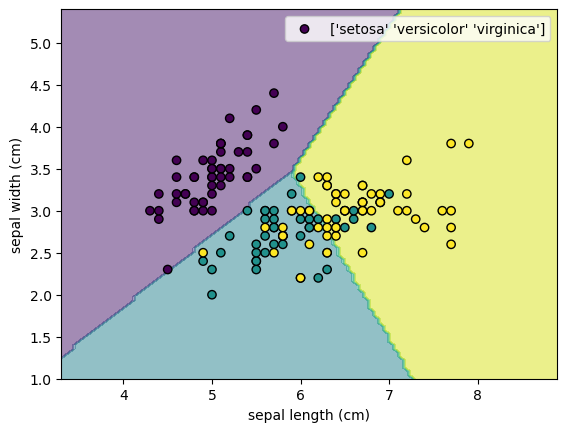

In [24]:
## code taken from: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html Date Accessed: 17/11/2023
iris = load_iris()
# elect the first two datapoint headers from the dataset for comparison
X = iris.data[:, :2]
# use logistic regression to divide the three types of flower.
classifier = LogisticRegression().fit(X, iris.target)
# use a built in Decision Boundary function to seperate the three flower species.
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, X, response_method="predict",
     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], alpha=0.5)
# plot a scatterplot.
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k", label=iris.target_names)
# Add legend to output scatterplot 
disp.ax_.legend()
plt.show()

References:

https://www.simplilearn.com/tutorials/statistics-tutorial/chi-square-test Date Accessed: 17/10/2023

https://ezspss.com/interpreting-chi-square-results-in-spss/ Dat Accessed: 17/10/2023

https://www.scribbr.com/statistics/chi-square-tests/#when - Date Accessed: 16/10/2023
